In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cafethai_prices.csv")

df['datetime'] = pd.to_datetime(df['date'] + " " + df['time'], dayfirst=True)

df['date'] = df['datetime'].dt.date

daily_sales = df.groupby(['date', 'coffee_name']).size().reset_index(name='cups_sold')

daily_sales['date'] = pd.to_datetime(daily_sales['date'])

In [3]:
all_forecasts = []

for drink, drink_data in daily_sales.groupby('coffee_name'):
    df_drink = drink_data[['date', 'cups_sold']].rename(columns={'date':'ds', 'cups_sold':'y'})

    model = Prophet(daily_seasonality=True, weekly_seasonality=True)
    model.fit(df_drink)

    future = model.make_future_dataframe(periods=60)
    forecast = model.predict(future)[['ds','yhat']].tail(60)
    forecast['coffee_name'] = drink

    all_forecasts.append(forecast)

result = pd.concat(all_forecasts).rename(columns={'ds':'date','yhat':'predicted_cups'})

DEBUG:cmdstanpy:input tempfile: /tmp/tmpet7yic2c/yoh17oku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet7yic2c/51oj99l4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47187', 'data', 'file=/tmp/tmpet7yic2c/yoh17oku.json', 'init=/tmp/tmpet7yic2c/51oj99l4.json', 'output', 'file=/tmp/tmpet7yic2c/prophet_modelfn8mdljv/prophet_model-20250922042416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet7yic2c/ute889tp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet7yic2c/vrst7xrc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [4]:

pivot_result = result.pivot(index='date', columns='coffee_name', values='predicted_cups')

display(pivot_result)
pivot_result = pivot_result.fillna(0)

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
date,,,,,,,,
2025-05-01,9.506918,14.468708,8.800736,4.499558,4.037747,2.437751,5.613302,12.140996
2025-05-02,7.936232,12.981205,8.127557,4.347671,3.797445,2.030500,5.435393,10.997782
2025-05-03,1.759430,3.170118,0.938922,1.452298,0.327046,0.380951,1.783599,1.116464
2025-05-04,1.788706,3.507020,0.681930,1.333529,0.127796,0.745275,1.563881,0.855342
2025-05-05,8.662543,12.602627,6.794763,3.978535,4.154370,1.975037,5.127058,10.582619
2025-05-06,7.997170,12.214978,6.761022,4.007834,3.526978,2.291724,4.454973,9.887765
2025-05-07,8.854686,12.720374,6.806261,4.164641,3.812778,2.155455,5.114559,9.211931
2025-05-08,7.932463,11.853628,7.306653,3.910213,3.195197,2.456721,4.420550,9.816345
2025-05-09,6.401866,10.387919,6.628811,3.763200,3.035218,2.051479,4.227261,8.751323


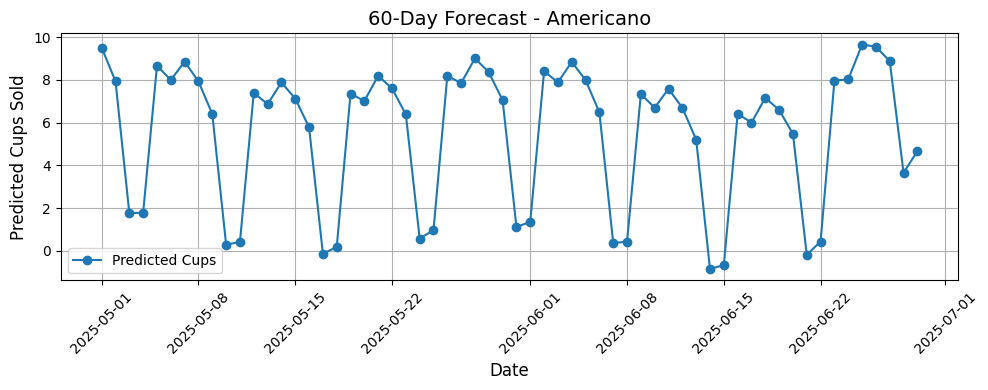

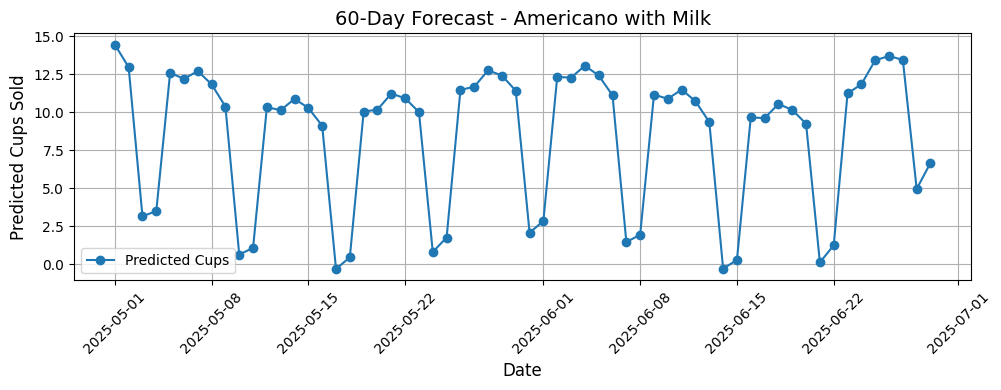

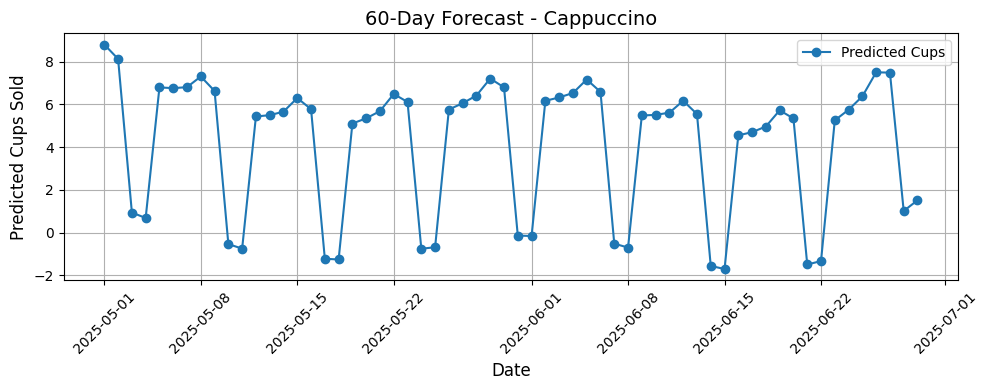

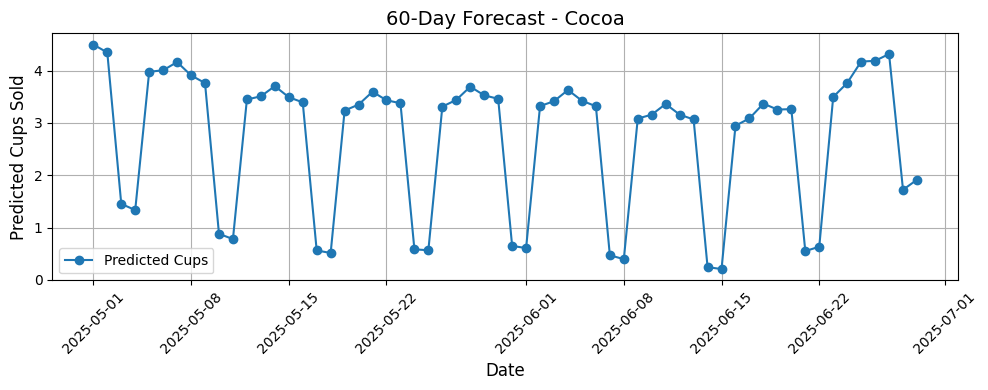

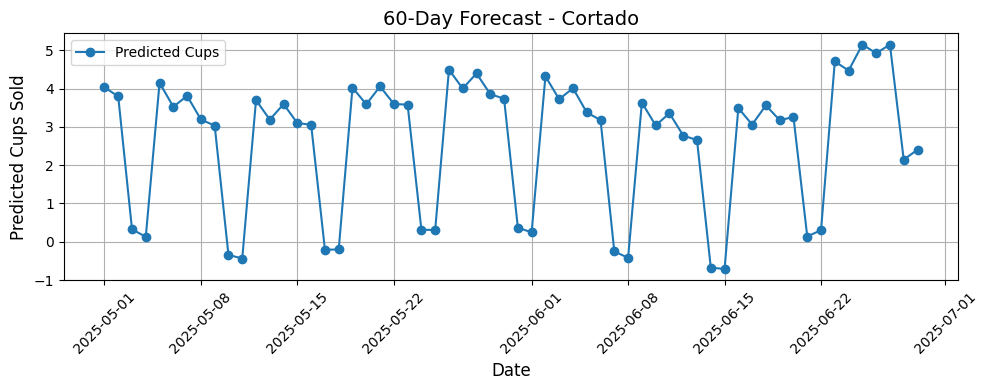

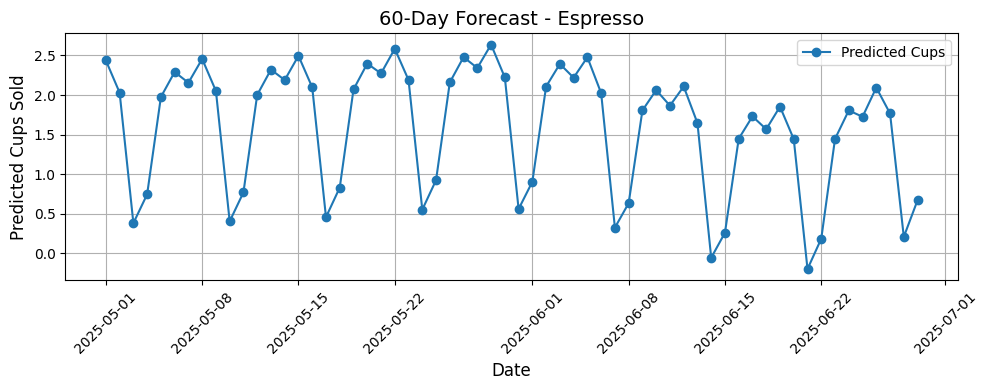

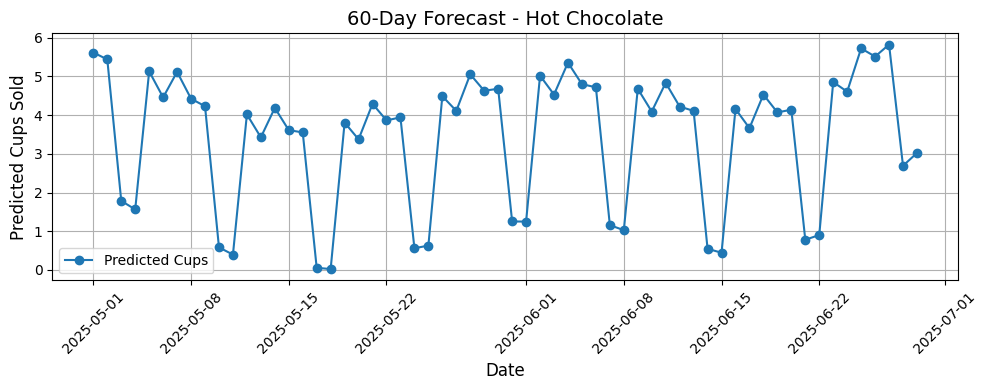

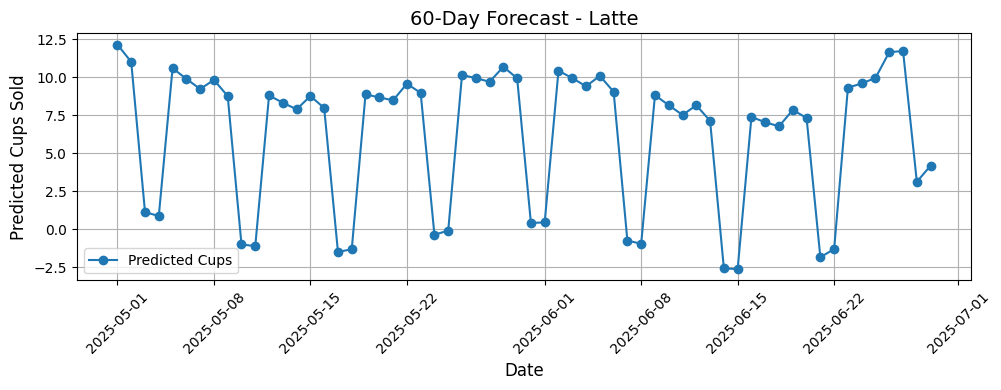

In [5]:
unique_drinks = result['coffee_name'].unique()

for drink in unique_drinks:
    df_drink = result[result['coffee_name'] == drink]

    plt.figure(figsize=(10,4))
    plt.plot(df_drink['date'], df_drink['predicted_cups'], marker='o', linestyle='-', label="Predicted Cups")
    plt.title(f"60-Day Forecast - {drink}", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Predicted Cups Sold", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()